# **Importing**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay ,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [4]:
from sklearn.naive_bayes import GaussianNB          # For Naive Bayes
from sklearn.linear_model import LogisticRegression # For Logistic Regression
from sklearn.tree import DecisionTreeClassifier     # For Decision Tree

# **Read ans Explore the data**

In [5]:
doh_df = pd.read_csv(r"D:\AYUOB\Uni\(3)third year\first semester(3)\Data Mining\project\Data\l1-doh.csv")
nondoh_df = pd.read_csv(r"D:\AYUOB\Uni\(3)third year\first semester(3)\Data Mining\project\Data\l1-nondoh.csv")

In [6]:
doh_df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:49:11,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,DoH
1,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:50:52,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,DoH
2,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:52:55,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,DoH
3,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:54:56,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,DoH
4,176.103.130.131,192.168.20.191,443,50749,2020-01-14 15:56:46,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,DoH


In [7]:
nondoh_df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,...,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,NonDoH
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,...,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,NonDoH
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0.033776,162,4.796305e+03,138,4085.741355,...,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,NonDoH
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0.060723,108,1.778568e+03,120,1976.186947,...,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,NonDoH
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0.019545,55,2.814019e+03,66,3376.822717,...,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,NonDoH


In [8]:
doh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269643 entries, 0 to 269642
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   SourceIP                                269643 non-null  object 
 1   DestinationIP                           269643 non-null  object 
 2   SourcePort                              269643 non-null  int64  
 3   DestinationPort                         269643 non-null  int64  
 4   TimeStamp                               269643 non-null  object 
 5   Duration                                269643 non-null  float64
 6   FlowBytesSent                           269643 non-null  int64  
 7   FlowSentRate                            269643 non-null  float64
 8   FlowBytesReceived                       269643 non-null  int64  
 9   FlowReceivedRate                        269643 non-null  float64
 10  PacketLengthVariance                    2696

In [9]:
nondoh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897493 entries, 0 to 897492
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   SourceIP                                897493 non-null  object 
 1   DestinationIP                           897493 non-null  object 
 2   SourcePort                              897493 non-null  int64  
 3   DestinationPort                         897493 non-null  int64  
 4   TimeStamp                               897493 non-null  object 
 5   Duration                                897493 non-null  float64
 6   FlowBytesSent                           897493 non-null  int64  
 7   FlowSentRate                            897493 non-null  float64
 8   FlowBytesReceived                       897493 non-null  int64  
 9   FlowReceivedRate                        897493 non-null  float64
 10  PacketLengthVariance                    8974

In [10]:
doh_df.describe()

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,269643.000000,269643.000000,269643.000000,2.696430e+05,2.696430e+05,2.696430e+05,2.696430e+05,2.696430e+05,269643.000000,269643.000000,...,269643.000000,269643.000000,269643.000000,269643.000000,269643.000000,269299.000000,269643.000000,269299.000000,269643.000000,269643.000000
mean,38366.919152,8838.751082,53.860267,6.575789e+04,8.207421e+03,6.736263e+04,7.057454e+03,1.293613e+05,299.078175,203.355411,...,1.104788,1.092043,1.543188,0.301802,0.670105,0.717219,0.372551,-0.442731,0.763784,1.347636
std,19368.859799,18011.750804,45.546712,1.902025e+05,1.718889e+05,1.822382e+05,1.009548e+05,1.405960e+05,199.784105,76.686285,...,0.722533,0.567513,8.623769,1.206093,2.746812,3.164925,2.333771,1.884229,1.495195,2.131636
min,443.000000,443.000000,0.000000,5.500000e+01,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,55.000000,...,-10.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000002,-1.000000,-10.000000,-10.000000,0.000000
25%,35236.000000,443.000000,30.090872,1.153000e+03,5.341205e+01,4.100000e+03,1.436472e+02,1.238665e+04,111.295316,140.928571,...,0.613302,0.582026,0.000052,0.007215,0.010407,0.013382,0.000015,-1.826517,0.432084,0.669354
50%,43948.000000,443.000000,34.063912,1.807000e+03,1.646758e+02,4.896000e+03,2.416428e+02,1.266689e+05,355.905730,223.400000,...,1.000000,0.888677,0.000081,0.009013,0.013542,0.015338,0.000027,-0.037521,0.993433,0.812249
75%,51950.000000,443.000000,105.743163,2.368550e+04,1.415331e+03,2.929600e+04,2.253600e+03,1.762639e+05,419.837942,240.777778,...,1.699441,1.622284,0.000518,0.022766,0.025042,0.015940,0.000144,0.832116,1.415310,1.309899
max,65532.000000,65497.000000,179.021144,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,...,12.956406,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747


In [11]:
nondoh_df.describe()

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,897493.000000,897493.000000,897493.000000,8.974930e+05,8.974930e+05,8.974930e+05,8.974930e+05,8.974930e+05,897493.000000,897493.000000,...,897493.000000,897493.000000,897493.000000,897493.000000,897493.000000,889809.000000,897493.000000,889809.000000,897493.000000,897493.000000
mean,51851.392457,1671.222301,10.222223,2.691329e+03,1.026107e+04,4.564065e+04,2.842560e+04,4.093357e+05,395.480258,305.730948,...,1.038812,0.988364,1.474248,0.215839,0.120998,0.059184,0.022287,-3.345596,-2.467566,0.658971
std,11120.482299,8203.353593,21.782562,3.586075e+04,2.705657e+05,3.932372e+05,2.025972e+05,1.233432e+06,502.922788,337.958512,...,1.098326,0.605342,13.086157,1.201993,0.738989,0.592682,0.459282,4.762091,5.230614,1.282366
min,443.000000,443.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,54.000000,...,-10.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000002,-1.000000,-10.000000,-10.000000,0.000000
25%,49154.000000,443.000000,0.044700,1.450000e+02,2.375574e+02,1.050000e+02,5.527314e+02,3.025000e+01,5.500000,60.500000,...,0.676920,0.575261,0.000000,0.000000,0.015210,0.015194,0.000031,-10.000000,-10.000000,0.000000
50%,54009.000000,443.000000,0.305495,1.195000e+03,2.039152e+03,2.579000e+03,2.821236e+03,9.923811e+04,315.020816,218.200000,...,1.000000,0.986329,0.000037,0.006115,0.024670,0.024853,0.009895,-1.400751,0.733870,0.421379
75%,59060.000000,443.000000,9.161848,2.224000e+03,5.026033e+03,6.890000e+03,1.035059e+04,3.962559e+05,629.488624,392.041667,...,1.534097,1.085383,0.000261,0.016149,0.052478,0.036614,0.025552,0.400031,1.281330,0.857189
max,65534.000000,65534.000000,167.476638,1.597561e+07,9.436036e+07,5.268011e+07,3.044444e+07,8.109299e+07,9005.164790,5146.275773,...,22.801710,8.777577,1002.919892,31.668910,45.013642,45.013642,45.013642,2.928405,7.096569,73.665470


In [6]:
doh_df['TimeStamp'] = pd.to_datetime(doh_df['TimeStamp'])

In [7]:
nondoh_df['TimeStamp'] = pd.to_datetime(nondoh_df['TimeStamp'])

# **Preprocessing : Missing values**

In [14]:
doh_df.isnull().sum()

SourceIP                                    0
DestinationIP                               0
SourcePort                                  0
DestinationPort                             0
TimeStamp                                   0
Duration                                    0
FlowBytesSent                               0
FlowSentRate                                0
FlowBytesReceived                           0
FlowReceivedRate                            0
PacketLengthVariance                        0
PacketLengthStandardDeviation               0
PacketLengthMean                            0
PacketLengthMedian                          0
PacketLengthMode                            0
PacketLengthSkewFromMedian                  0
PacketLengthSkewFromMode                    0
PacketLengthCoefficientofVariation          0
PacketTimeVariance                          0
PacketTimeStandardDeviation                 0
PacketTimeMean                              0
PacketTimeMedian                  

In [15]:
nondoh_df.isnull().sum()

SourceIP                                     0
DestinationIP                                0
SourcePort                                   0
DestinationPort                              0
TimeStamp                                    0
Duration                                     0
FlowBytesSent                                0
FlowSentRate                                 0
FlowBytesReceived                            0
FlowReceivedRate                             0
PacketLengthVariance                         0
PacketLengthStandardDeviation                0
PacketLengthMean                             0
PacketLengthMedian                           0
PacketLengthMode                             0
PacketLengthSkewFromMedian                   0
PacketLengthSkewFromMode                     0
PacketLengthCoefficientofVariation           0
PacketTimeVariance                           0
PacketTimeStandardDeviation                  0
PacketTimeMean                               0
PacketTimeMed

In [8]:
doh_df['ResponseTimeTimeMedian'] = doh_df['ResponseTimeTimeMedian'].fillna(doh_df['ResponseTimeTimeMedian'].median())
doh_df['ResponseTimeTimeSkewFromMedian'] = doh_df['ResponseTimeTimeSkewFromMedian'].fillna(doh_df['ResponseTimeTimeSkewFromMedian'].median())

nondoh_df['ResponseTimeTimeMedian'] = nondoh_df['ResponseTimeTimeMedian'].fillna(nondoh_df['ResponseTimeTimeMedian'].median())
nondoh_df['ResponseTimeTimeSkewFromMedian'] = nondoh_df['ResponseTimeTimeSkewFromMedian'].fillna(nondoh_df['ResponseTimeTimeSkewFromMedian'].median())


# **Preprocessing : Outliers**

In [17]:
# Calculate Q1, Q3 and IQR for the DoH dataset
Q1_doh = doh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']).quantile(0.25)
Q3_doh = doh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']).quantile(0.75)
IQR_doh = Q3_doh - Q1_doh

# Detect outliers for the DoH dataset (values outside of [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
outliers_doh = ((doh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']) < (Q1_doh - 1.5 * IQR_doh)) | (doh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']) > (Q3_doh + 1.5 * IQR_doh)))

# Calculate Q1, Q3 and IQR for the Non-DoH dataset
Q1_nondoh = nondoh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']).quantile(0.25)
Q3_nondoh = nondoh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']).quantile(0.75)
IQR_nondoh = Q3_nondoh - Q1_nondoh

# Detect outliers for the Non-DoH dataset
outliers_nondoh = ((nondoh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']) < (Q1_nondoh - 1.5 * IQR_nondoh)) | (nondoh_df.drop(columns=['SourceIP','DestinationIP','TimeStamp','Label']) > (Q3_nondoh + 1.5 * IQR_nondoh)))


In [9]:
scaler = StandardScaler()

In [10]:
numerical_columns = doh_df.select_dtypes(include=['float64', 'int64']).columns
doh_df[numerical_columns] = scaler.fit_transform(doh_df[numerical_columns])
#Normal distribution

In [11]:
numerical_columns = nondoh_df.select_dtypes(include=['float64', 'int64']).columns
nondoh_df[numerical_columns] = scaler.fit_transform(nondoh_df[numerical_columns])
#Normal distribution

# **Preprocessing : Duolicates**

In [21]:
doh_df.duplicated().sum()

0

In [22]:
nondoh_df.duplicated().sum()

0

# **Combining data**

In [12]:
combined_df = pd.concat([doh_df, nondoh_df], ignore_index=True)

In [24]:
combined_df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,0.639279,-0.466127,2020-01-14 15:49:11,0.905035,-0.018122,-0.043936,-0.011000,-0.063098,...,-0.911729,-0.178824,-0.223321,-0.233901,-0.217980,-0.148142,0.272639,-0.494297,-0.081012,DoH
1,192.168.20.191,176.103.130.131,0.639279,-0.466127,2020-01-14 15:50:52,1.502835,0.147580,-0.043286,0.185852,-0.061709,...,-1.027283,-0.178811,-0.221875,-0.235080,-0.219817,-0.148074,0.390590,-0.561553,0.025683,DoH
2,192.168.20.191,176.103.130.131,0.639279,-0.466127,2020-01-14 15:52:55,1.473175,-0.141817,-0.045883,-0.159828,-0.066776,...,-0.633302,-0.178855,-0.226999,-0.233313,-0.217958,-0.148128,0.366569,-0.453937,-0.182624,DoH
3,192.168.20.191,176.103.130.131,0.639279,-0.466127,2020-01-14 15:54:56,1.243579,-0.019794,-0.044485,0.013139,-0.063654,...,-0.784449,-0.178899,-0.233422,-0.236704,-0.220378,-0.148101,0.286453,-0.741517,-0.154858,DoH
4,176.103.130.131,192.168.20.191,-1.957988,2.326832,2020-01-14 15:56:46,0.008115,0.094022,-0.038776,0.051808,-0.055878,...,-1.030302,-0.169776,-0.017074,-0.234518,-0.226455,-0.159626,0.381475,-0.449206,4.455363,DoH


In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167136 entries, 0 to 1167135
Data columns (total 35 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   SourceIP                                1167136 non-null  object        
 1   DestinationIP                           1167136 non-null  object        
 2   SourcePort                              1167136 non-null  float64       
 3   DestinationPort                         1167136 non-null  float64       
 4   TimeStamp                               1167136 non-null  datetime64[ns]
 5   Duration                                1167136 non-null  float64       
 6   FlowBytesSent                           1167136 non-null  float64       
 7   FlowSentRate                            1167136 non-null  float64       
 8   FlowBytesReceived                       1167136 non-null  float64       
 9   FlowReceivedRate        

In [14]:
combined_df.describe()

,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,1.167136e+06,1.167136e+06,1167136,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,...,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06,1.167136e+06
mean,-1.718254e-16,5.235609e-17,2020-01-20 23:25:42.116257280,-1.675395e-16,5.972247e-18,1.607210e-18,9.034469e-18,-9.996360e-18,-1.714357e-17,7.870459e-17,...,-1.661758e-16,-2.172169e-16,8.036051e-18,-5.737253e-17,1.563377e-17,-1.408744e-17,-7.792534e-18,2.774142e-16,-6.662617e-17,-7.919163e-17
min,-4.622859e+00,-4.661272e-01,2019-12-09 21:53:15,-1.182530e+00,-3.454372e-01,-4.775431e-02,-3.696412e-01,-1.403110e-01,-9.200943e-01,-1.497010e+00,...,-1.536929e+01,-3.686339e+00,-2.949050e-01,-1.079357e+00,-1.516937e+00,-2.264692e-01,-2.225840e+00,-5.075618e+00,-7.198931e+00,-6.322086e-01
25%,-2.238566e-01,-1.497221e-01,2019-12-19 22:09:49,-4.672829e-01,-7.351577e-02,-3.781452e-02,-1.158961e-01,-1.350577e-01,-3.318429e-01,-7.754281e-01,...,-4.473546e-01,-7.596361e-01,-1.126571e-01,-1.795681e-01,-1.565952e-01,-9.958001e-02,-4.851535e-02,-1.405900e+00,-1.440068e+00,-5.138712e-01
50%,2.172216e-01,-1.497221e-01,2020-01-13 14:41:41,-4.453663e-01,-6.554047e-02,-3.375776e-02,-1.153113e-01,-1.174914e-01,-2.020899e-01,1.598015e-02,...,-3.533718e-02,-7.685498e-02,-1.126571e-01,-1.794745e-01,-1.379541e-01,-6.760540e-02,-4.839777e-02,3.874066e-01,5.438564e-01,-2.259379e-01
75%,6.611181e-01,-1.497221e-01,2020-01-14 18:20:37,4.346816e-02,-1.648959e-02,-2.389366e-02,-9.925987e-02,-6.380114e-02,4.962311e-02,4.760251e-01,...,5.428359e-01,4.743592e-01,-1.126448e-01,-1.678636e-01,-1.142591e-01,-5.156154e-02,1.334239e-03,7.582103e-01,6.806790e-01,1.210347e-01
max,1.402516e+00,7.784964e+00,2020-04-01 23:50:38,7.219284e+00,4.454153e+02,3.487144e+02,1.338492e+02,1.501306e+02,6.541398e+01,1.711931e+01,...,1.981462e+01,1.286747e+01,7.652714e+01,2.616746e+01,6.074880e+01,7.617540e+01,9.796028e+01,1.812420e+00,3.119999e+00,5.693112e+01
std,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


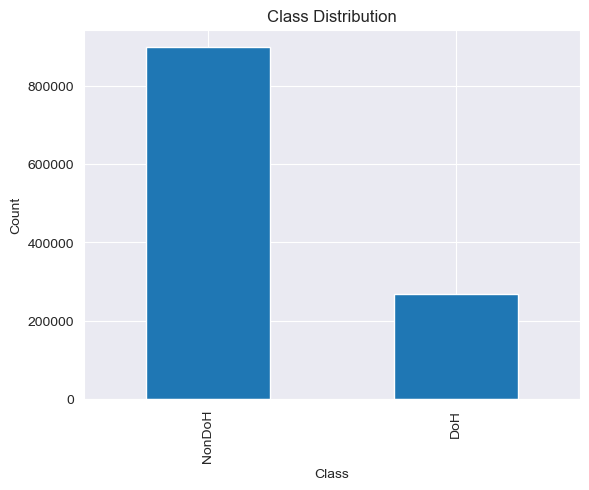

In [17]:
combined_df['Label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [25]:
label_encoder = LabelEncoder()

In [26]:
combined_df['Label'] = label_encoder.fit_transform(combined_df['Label'])

In [27]:
labels = ['DoH','NonDoH']

# **Features Selection**

In [28]:
X = combined_df.drop(['Label','SourceIP','DestinationIP','TimeStamp'], axis=1)
y = combined_df['Label']

In [29]:
info_gain = mutual_info_classif(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
feature_importance = feature_importance.sort_values(by='Information Gain', ascending=False)


In [30]:
feature_importance.head(10)

,Feature,Information Gain
1,DestinationPort,0.570578
11,PacketLengthMode,0.555247
10,PacketLengthMedian,0.546115
27,ResponseTimeTimeMode,0.540330
0,SourcePort,0.539183
26,ResponseTimeTimeMedian,0.538831
19,PacketTimeMode,0.532576
23,ResponseTimeTimeVariance,0.528058
3,FlowBytesSent,0.486500
25,ResponseTimeTimeMean,0.480710


In [31]:
top_features = feature_importance['Feature'][:10]
X_selected = X[top_features]

In [32]:
X_selected.head()

,DestinationPort,PacketLengthMode,PacketLengthMedian,ResponseTimeTimeMode,SourcePort,ResponseTimeTimeMedian,PacketTimeMode,ResponseTimeTimeVariance,FlowBytesSent,ResponseTimeTimeMean
0,-0.466127,-1.651841,0.123050,-0.148142,0.639279,-0.217980,-0.081906,-0.178824,-0.018122,-0.233901
1,-0.466127,-1.651841,0.406800,-0.148074,0.639279,-0.219817,2.431572,-0.178811,0.147580,-0.235080
2,-0.466127,-1.651841,-0.184346,-0.148128,0.639279,-0.217958,-0.171514,-0.178855,-0.141817,-0.233313
3,-0.466127,-1.651841,0.406800,-0.148101,0.639279,-0.220378,0.898208,-0.178899,-0.019794,-0.236704
4,2.326832,5.425188,0.406800,-0.159626,-1.957988,-0.226455,0.404369,-0.169776,0.094022,-0.234518


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [34]:



def evaluate_model(y_test, y_pred, model_name="Model"):
    """
    Evaluate the performance of a classification model.
    
    Parameters:
        y_test (array-like): True labels.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model for display purposes.
    """
    print(f"{model_name} Evaluation Metrics:")
    
    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Classification Report (precision, recall, f1-score, and support)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot(cmap='Blues', values_format='d')  # Display confusion matrix with count format
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# **Modeling : Naive Bayes**

Naive Bayes Evaluation Metrics:
Accuracy: 0.7771669127580032

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.05      0.09     80889
           1       0.78      1.00      0.87    269252

    accuracy                           0.78    350141
   macro avg       0.78      0.52      0.48    350141
weighted avg       0.78      0.78      0.69    350141



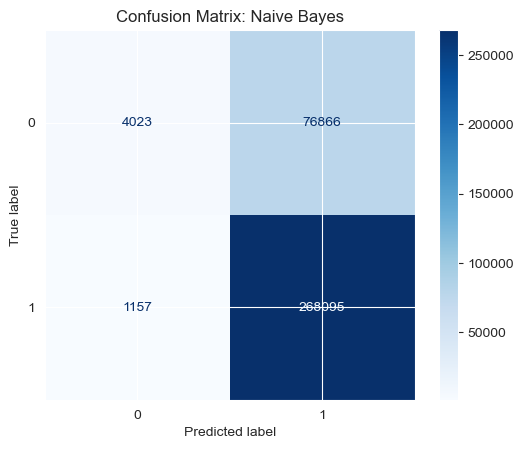

In [35]:
# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
nb_y_pred = nb_model.predict(X_test)
evaluate_model(y_test, nb_y_pred, model_name="Naive Bayes")

# **Modeling : Logistic Regression**

Logistic Regression Evaluation Metrics:
Accuracy: 0.7689816388255017

Classification Report:


C:\Users\User\anaconda3\envs\Data_ScienceEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\Data_ScienceEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\Data_ScienceEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     80889
           1       0.77      1.00      0.87    269252

    accuracy                           0.77    350141
   macro avg       0.38      0.50      0.43    350141
weighted avg       0.59      0.77      0.67    350141



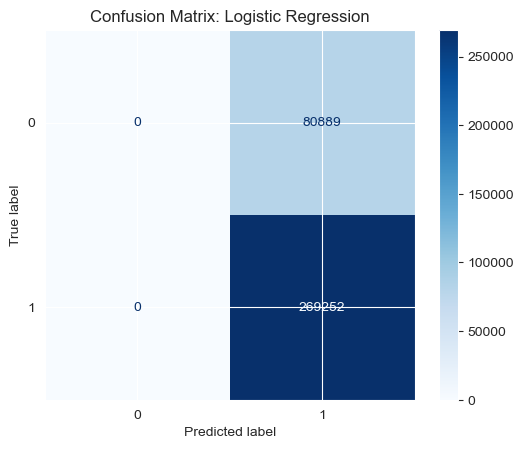

In [36]:
# Train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_y_pred = lr_model.predict(X_test)
evaluate_model(y_test, lr_y_pred, model_name="Logistic Regression")

# **Modeling : Decision Tree**

Decision Tree Evaluation Metrics:
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80889
           1       1.00      1.00      1.00    269252

    accuracy                           1.00    350141
   macro avg       1.00      1.00      1.00    350141
weighted avg       1.00      1.00      1.00    350141



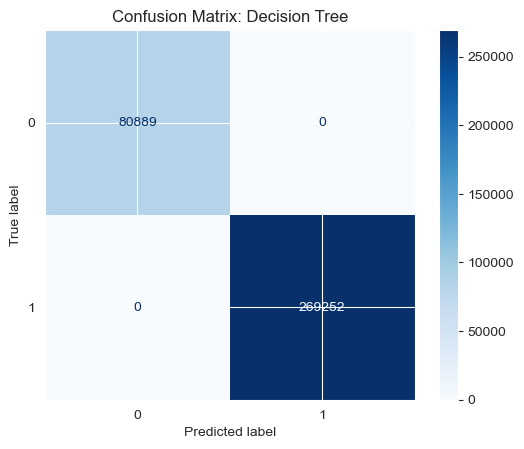

In [37]:
# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_y_pred = dt_model.predict(X_test)
evaluate_model(y_test, dt_y_pred, model_name="Decision Tree")